<a href="https://colab.research.google.com/github/anushree1125/DS_ML-widpython/blob/main/Task9_HRanalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GO_STP: 3122

**Logistic regression model**

Predict retention of an employee within an organization such that whether the employee will leave the company or continue with it. An organization is only as good as its employees, and these people are the true source of its competitive advantage. Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression

In [2]:
p = pd.read_csv("/content/HR_comma_sep.csv")
print(p)

       satisfaction_level  last_evaluation  ...  Department  salary
0                    0.38             0.53  ...       sales     low
1                    0.80             0.86  ...       sales  medium
2                    0.11             0.88  ...       sales  medium
3                    0.72             0.87  ...       sales     low
4                    0.37             0.52  ...       sales     low
...                   ...              ...  ...         ...     ...
14994                0.40             0.57  ...     support     low
14995                0.37             0.48  ...     support     low
14996                0.37             0.53  ...     support     low
14997                0.11             0.96  ...     support     low
14998                0.37             0.52  ...     support     low

[14999 rows x 10 columns]


**Data Exploration**

In [ ]:
p.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
p.number_project.head()

0    2
1    5
2    7
3    5
4    2
Name: number_project, dtype: int64

In [ ]:
p.Department.head()

0    sales
1    sales
2    sales
3    sales
4    sales
Name: Department, dtype: object

In [ ]:
p.salary

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

In [ ]:
p.salary.shape

(14999,)

In [ ]:
p.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
p.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
p.shape

(14999, 10)

In [ ]:
p.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
p.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
p.corr

<bound method DataFrame.corr of        satisfaction_level  last_evaluation  ...  Department  salary
0                    0.38             0.53  ...       sales     low
1                    0.80             0.86  ...       sales  medium
2                    0.11             0.88  ...       sales  medium
3                    0.72             0.87  ...       sales     low
4                    0.37             0.52  ...       sales     low
...                   ...              ...  ...         ...     ...
14994                0.40             0.57  ...     support     low
14995                0.37             0.48  ...     support     low
14996                0.37             0.53  ...     support     low
14997                0.11             0.96  ...     support     low
14998                0.37             0.52  ...     support     low

[14999 rows x 10 columns]>

In [3]:
p["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
p["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
p.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Visualisation**

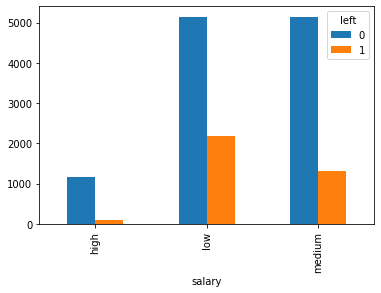

In [ ]:
pd.crosstab(p.salary,p.left).plot(kind='bar')

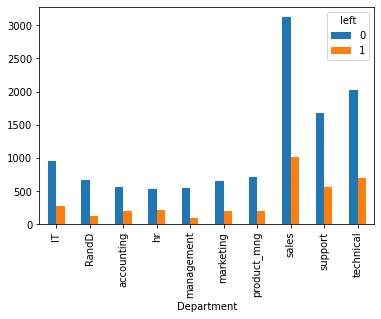

In [ ]:
pd.crosstab(p.Department,p.left).plot(kind='bar')

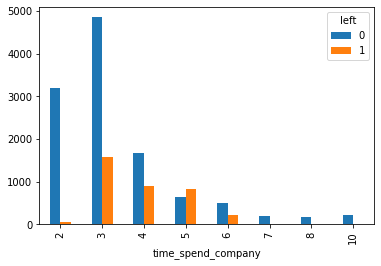

In [ ]:
pd.crosstab(p.time_spend_company,p.left).plot(kind='bar')

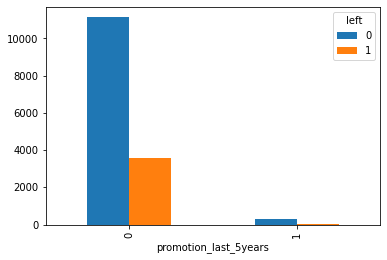

In [ ]:
pd.crosstab(p.promotion_last_5years,p.left).plot(kind='bar')

In [4]:
new_data=pd.get_dummies(p, columns = ['salary','Department'])
new_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
print(p.shape)
print(new_data.shape)

(14999, 10)
(14999, 21)


In [6]:
x = new_data.drop(["left"],axis="columns")
print(x.shape)

y=new_data.left
print(y.shape)

(14999, 20)
(14999,)


In [ ]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
print(x)

       satisfaction_level  ...  Department_technical
0                    0.38  ...                     0
1                    0.80  ...                     0
2                    0.11  ...                     0
3                    0.72  ...                     0
4                    0.37  ...                     0
...                   ...  ...                   ...
14994                0.40  ...                     0
14995                0.37  ...                     0
14996                0.37  ...                     0
14997                0.11  ...                     0
14998                0.37  ...                     0

[14999 rows x 20 columns]


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

**Logistic regression model to predict Employee Attrition**

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.25, random_state=15)

In [17]:
lg = LogisticRegression(random_state = 1)
lg.fit(xtrain, ytrain)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred = lg.predict(xtest)
print(y_pred)

[0 0 0 ... 0 0 0]


Confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred)
cm

array([[2653,  223],
       [ 568,  306]])

Accuracy

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_pred))

0.7890666666666667


In [21]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, y_pred)
print(mse)

0.21093333333333333
